In [1]:
include("/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using HNProcess
using DataRefine
using PartitioningData
using Random

  Activating 

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



project at `~/Documents/Research Professor/Mikhail Erementchouk/HN_V2`


In [2]:
#= template

image = [
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
] 
=#

i1 = [
    -1 1 1 1 1 1 1 1 1 -1;
    1 -1 1 1 1 1 1 1 -1 1;
    1 1 -1 1 1 1 1 -1 1 1;
    1 1 1 -1 1 1 -1 1 1 1;
    1 1 1 1 -1 -1 1 1 1 1;
    1 1 1 1 -1 -1 1 1 1 1;
    1 1 1 -1 1 1 -1 1 1 1;
    1 1 -1 1 1 1 1 -1 1 1;
    1 -1 1 1 1 1 1 1 -1 1;
    -1 1 1 1 1 1 1 1 1 -1;
] 

i2 = [
    -1 1 1 1 -1 -1 1 1 1 -1;
    1 1 1 1 -1 -1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    -1 1 1 1 1 1 1 1 1 -1;
    -1 1 1 1 1 1 1 1 1 -1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 -1 -1 1 1 1 1;
    -1 1 1 1 -1 -1 1 1 1 -1;
] 

i3 = [
    -1 -1 1 1 1 1 1 1 -1 -1;
    -1 -1 1 1 1 1 1 1 -1 -1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1 1 1;
    -1 -1 1 1 1 1 1 1 -1 -1;
    -1 -1 1 1 1 1 1 1 -1 -1;
] 

10×10 Matrix{Int64}:
 -1  -1  1  1  1  1  1  1  -1  -1
 -1  -1  1  1  1  1  1  1  -1  -1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
  1   1  1  1  1  1  1  1   1   1
 -1  -1  1  1  1  1  1  1  -1  -1
 -1  -1  1  1  1  1  1  1  -1  -1

In [3]:
sim_time = 20
steps = 500
im_all = orthogonal_image_generator(64)
im_all_vec = vec.(im_all)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
sl::Vector{Int64}=shuffle(1:64)[1:2] #random
for t in sl
    push!(selected, im_all[t])
end
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
parameters["images"] = [i1,i2,i3]
println(length(parameters["images"]))
@show length(parameters["images"])
 miss = filter(x -> !(x in sl), 1:64)
@show miss
 used = filter(x -> x in sl, 1:64)
@show used

64
3
length(parameters["images"]) = 3
miss = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 64]
used = [54, 58]


2-element Vector{Int64}:
 54
 58

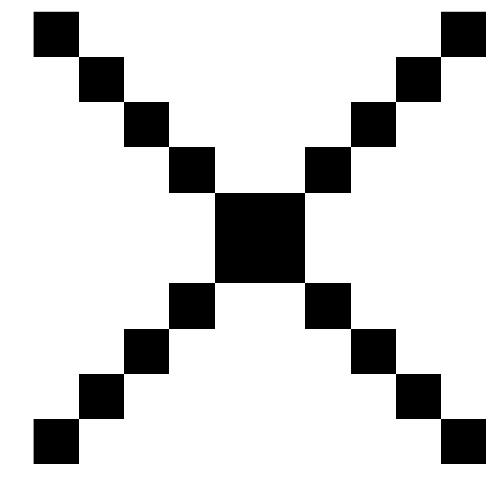

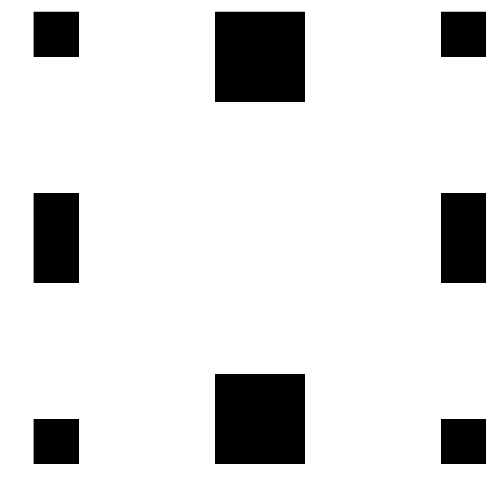

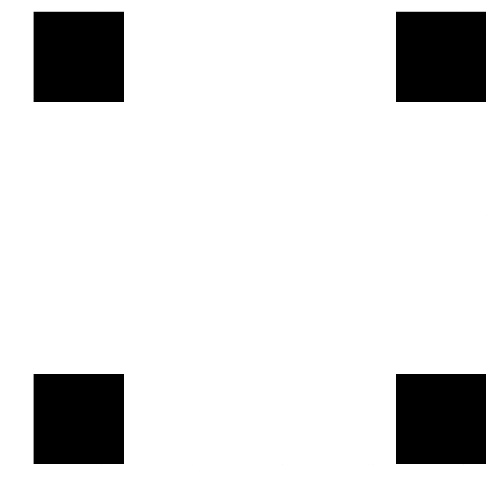

In [4]:
for i in parameters["images"]
    binary_image_visualizer(i, 500, "hi", d = true)
end

In [17]:
# Generates A matrix which contains coefficients

ims = parameters["images"]
A = zeros(length(ims),length(ims))
for i in 1:(length(ims))
    for k in i:(length(ims))
        D_ij = (vec(ims[i])' * vec(ims[k]))^2
        println(D_ij)
        A[i,k] = D_ij
        A[k,i] = D_ij
    end
end
pretty_table(A)

10000
1936
3600
10000
2704
10000
┌─────────┬─────────┬─────────┐
│  Col. 1 │  Col. 2 │  Col. 3 │
├─────────┼─────────┼─────────┤
│ 10000.0 │  1936.0 │  3600.0 │
│  1936.0 │ 10000.0 │  2704.0 │
│  3600.0 │  2704.0 │ 10000.0 │
└─────────┴─────────┴─────────┘


In [18]:
# Encodes objective function to maximize
function objective_func_G(state, images)
    s = 0
    for i in images
        temp = 0 
        for m in 1:length(state)
            for n in 1:length(state)
                #state[m] * i[m] * state[n] * i[n] is Q(sigma) where state is sigma and i is image
                temp += state[m] * i[m] * state[n] * i[n]
            end
        end
        s += temp
    end
    return (s * 0.25)
end

objective_func_G (generic function with 1 method)

In [19]:
# Encodes objective function to maximize
function objective_func_G_test(state, images)
    s = 0
    for i in images
        temp = 0 
        temp = (vec(state)'*vec(i))^2
        s += temp
    end
    return (s * 0.25)
end

objective_func_G_test (generic function with 1 method)

In [20]:
for i in 1:length(ims)
    println("$(i)th image, G value is $(objective_func_G(ims[i], ims))")
end

1th image, G value is 3884.0
2th image, G value is 3660.0
3th image, G value is 4076.0


In [21]:
for i in 1:length(ims)
    println("$(i)th image, G value is $(objective_func_G_test(ims[i], ims))")
end

1th image, G value is 3884.0
2th image, G value is 3660.0
3th image, G value is 4076.0


In [22]:
#Compute weights
res = 100000*ones(length(ims)) # change coeff if precision is not ideal
lambdas = A \ res
@show lambdas
A*lambdas
parameters["scaling"] = lambdas

lambdas = [6.557754256787851, 7.1905200184077325, 5.6948918545789216]


3-element Vector{Float64}:
 6.557754256787851
 7.1905200184077325
 5.6948918545789216

In [29]:
# Generates A matrix which contains coefficients
function lambda_gen(images, scale = 1)
    A = zeros(length(images),length(images))
    for i in 1:(length(images))
        for k in i:(length(images))
            D_ij = (vec(images[i])' * vec(images[k]))^2
            println(D_ij)
            A[i,k] = D_ij
            A[k,i] = D_ij
        end
    end
    res = scale*ones(length(images)) # change coeff if precision is not ideal
    lambdas = A \ res
    return lambdas
end

lambda_gen (generic function with 2 methods)

In [30]:
k= lambda_gen(ims)
print(k)

10000
1936
3600
10000
2704
10000
[6.557754256787851e-5, 7.190520018407732e-5, 5.694891854578921e-5]

In [23]:
function objective_func_G_scaled(state, images, lambdas)
    s = 0
    for i in images
        temp = 0 
        temp =  (vec(state)'*vec(i))^2
        s += lambdas[findfirst(x -> x == i, images)] * temp
    end
    return (s * 0.25)
end

objective_func_G_scaled (generic function with 1 method)

In [28]:
for i in 1:length(ims)
    println("$(i)th image, G value is $(objective_func_G_scaled(ims[i], ims, k))")
end

1th image, G value is 25000.0
2th image, G value is 25000.000000000004
3th image, G value is 24999.999999999996


In [25]:
#Prints out G value of both, weighted is with lambdas
# norm is without with their respective spin states
println("weighted: $(objective_func_G_scaled(normalized_HN[1][1], ims, lambdas))")
println("norm: $(objective_func_G(baseline[1][1], ims))")

LoadError: UndefVarError: `normalized_HN` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [264]:
function get_HN_graph(images ::Vector{Matrix{Int}}, scale ::Float64) ::SimpleWeightedGraph
    part_data = vec(images[1]')
    graph_set = SimpleWeightedGraph(length(part_data))
        
    for og in range(1,length(part_data) - 1)
        for term in range(og+1,length(part_data))
            # EDIT HERE, i is origin, j is end. We need to do this multiplication for every image
            w = 0
            for i in images
                w += i[og] * i[term] / scale
            end
            add_edge!(graph_set, og, term, w)
        end
    end
    return graph_set
end

get_HN_graph (generic function with 2 methods)

In [268]:
sim_time = 4
steps = 3000
parameters = Dict{String, Any}(
    "images" => [i1,i2,i3],
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => lambdas,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
parameters["images"] = [i1,i2,i3]
println(length(parameters["images"]))
#Running
parameters["scaling"] = lambdas
normalized_HN = HN_Solver_Traj_test(parameters, true) #Does the weighted ones
save_trajectories(res[2], "8by8","len3_weight_t1")

3
100
(100, 100)
(100, 100)
(100, 100)
-0.08053382420616659
-0.08053382420616659
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬─────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │ Col. 9 │ Col. 10 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼─────────┤
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      -1 │
│      1 │     -1 │      1 │      1 │      1 │      1 │      1 │      1 │     -1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │       1 │
│      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │      1 │

In [267]:
sim_time = 4
steps = 3000
parameters = Dict{String, Any}(
    "images" => [i1,i2,i3],
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
parameters["images"] = [i1,i2,i3]
println(length(parameters["images"]))
#Running
baseline = HN_Solver_Traj(parameters, true) # normal attempt
save_trajectories(res[2], "8by8","len3_norm_t1")

3
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬─────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │ Col. 9 │ Col. 10 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼─────────┤
│      1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │       1 │
│     -1 │      1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      -1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      -1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      -1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      -1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      -1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      -1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │    

In [148]:
function get_HN_graph_test(images ::Vector{Matrix{Int}}, scale ::Vector) ::SimpleWeightedGraph
    part_data = vec(images[1]')
    graph_set = SimpleWeightedGraph(length(part_data))
        
    for og in range(1,length(part_data) - 1)
        for term in range(og+1,length(part_data))
            # EDIT HERE, i is origin, j is end. We need to do this multiplication for every image
            w = 0
            for i in 1:length(images)
                w += images[i][og] * images[i][term] / scale[i]
            end
            add_edge!(graph_set, og, term, w)
        end
    end
    return graph_set
end

get_HN_graph_test (generic function with 1 method)

In [178]:
function HN_Solver_Traj_test(parameters::Dict{String, Any}, debug::Bool = false)
    # Just gets raw result, no visualizer

    scaling = parameters["scaling"] #Scaling coeff
    S = parameters["images"] # Images
    time_total= parameters["sim_time"] # how long the sim is
    num_steps = parameters["steps"] # number of steps in the sim
    dt_sim = parameters["delta"] # dt
    delta_t = time_total/num_steps
    traj_collection::Vector{Vector{Dice.Hybrid}} = []

    # Make Graph
    graph_set = get_HN_graph_testV2(parameters["images"], parameters["scaling"])    
    # Making model
    model = Dice.Model(graph_set, Dice.model_2_hybrid_coupling, delta_t)

    # Making randomized initial state
    num_vertices = Graphs.nv(model.graph)
    
    converged = 0
    diverged = 0


    pinned::Vector{Tuple{Int64, Int8}} = []
    state::Dice.Hybrid = Dice.get_random_hybrid(num_vertices, 2.0)
    #println(reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    for stim in parameters["initial_stimuli"]
        # Every n entries is a column, thus taking # of columns and subtracting 1 brings you to where the column begins
        # Adding 1 will bring you to the first entry in the column and so on for +k
        pos = (stim[2]-1) * size(parameters["images"][1],1) + stim[1]
        state[1][pos] = stim[3]
        push!(pinned, (pos, stim[3]))
    end
    #println(state[1]
    traj = Dice.trajectories_pinned(model.graph, num_steps, dt_sim, model.coupling, state, pinned)
    push!(traj_collection, traj)
    # Comment out the other part of the or conditional to ignore negative images
 #=   if (reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
        -1 .*reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
        converged += 1
        global sol = state[1]
        break
    end =#

    
    if debug
        pretty_table(reshape(traj[end][1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    end
    return(state,traj_collection)
end    

HN_Solver_Traj_test (generic function with 2 methods)

In [180]:
sol_finder(res[1], parameters)

Any[]

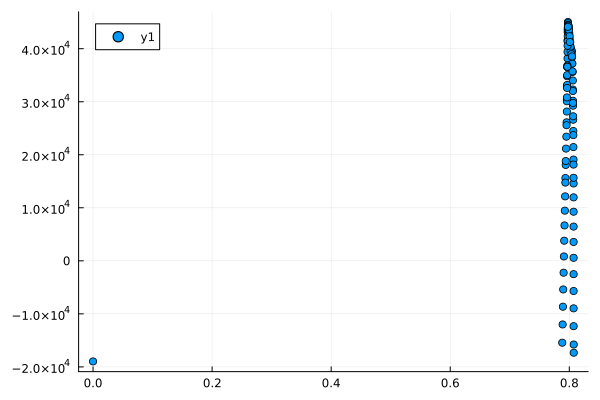

In [181]:
    rot = iterative_rotater_state(res[1],parameters)
    g = get_HN_graph(parameters["images"],parameters["scaling"])
    binary = [i[1] for i in rot]
    x = res[1][2]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = scatter(x,y)

In [147]:
s = length(parameters["images"][1])

100

In [270]:
function get_HN_graph_testV2(images ::Vector{Matrix{Int}}, scale ::Vector) ::SimpleWeightedGraph
    all_adjacencies = [] #will contain all A for each image, to then be combined later
    s = length(images[1])
    #println(s)
    for mu in 1:length(images) # goes over all mu
        A_mu = zeros(s,s)
        #println(size(A_mu))
        for m in 1:(s-1)
            for n in m:(s)
                c = images[mu][m] * images[mu][n]
                A_mu[m,n] = c
                A_mu[n,m] = c
            end
        end
        A_mu *= scale[mu]
        push!(all_adjacencies, A_mu)
    end
    full_adj = sum(all_adjacencies)
    graph_set = SimpleWeightedGraph(full_adj)
    return graph_set
end    

get_HN_graph_testV2 (generic function with 1 method)

In [175]:
g = get_HN_graph_testV2(parameters["images"], parameters["scaling"])

100
(100, 100)
(100, 100)
(100, 100)
-0.08053382420616659
-0.08053382420616659


{100, 5049} undirected simple Int64 graph with Float64 weights

100
(100, 100)
(100, 100)
(100, 100)
-0.08053382420616659
-0.08053382420616659


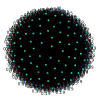

In [177]:
g = get_HN_graph_testV2(parameters["images"], parameters["scaling"])
elabels = [weights(g)[e.src, e.dst] for e in edges(g)]

# Plot with edge labels
 gplot(g, 
      nodelabel=1:nv(g), 
      edgelabel=round.(elabels, digits=2),)

# testing this out

In [31]:
sim_time = 4
steps = 3000
parameters = Dict{String, Any}(
    "images" => [i1,i2,i3],
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
parameters["images"] = [i1,i2,i3]
println(length(parameters["images"]))

3


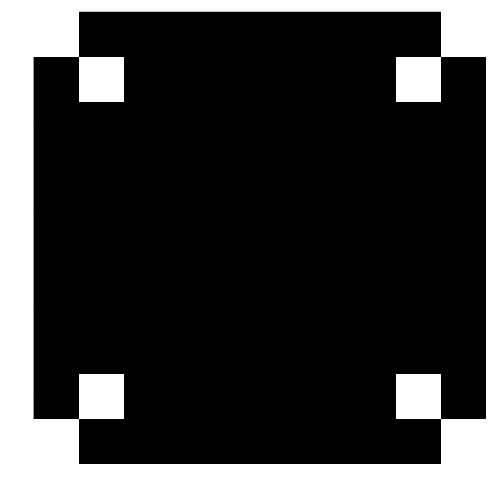

File 10by10_1_len3_normal_t1.dat is generated


In [37]:
#to scale, simply make parameters["scaling"] = lambda_gen(parameters["images"],coeff)

parameters["scaling"] = 1.0
res = HN_Solver_Traj(parameters);
sol_finder(res[1], parameters)
binary_image_visualizer(reshape(res[1][1], 10,10), 500, "mew", d = true)
save_trajectories(res[2], "10by10","len3_normal_t1")

[6.557754256787851e-5, 7.190520018407732e-5, 5.694891854578921e-5]

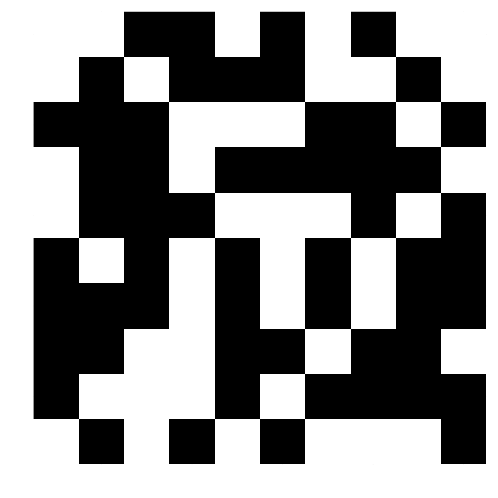

File 10by10_1_len3_weight_1x_divide.dat is generated


In [8]:
#to scale, simply make parameters["scaling"] = lambda_gen(parameters["images"],coeff)
# note, since scale is done by dividing, it is necessary to set scale to 1/lambda to make it multiple rather than divide with
# weights

#should be moving v fast since this is divide, x dot is very large
# tested when graph generator used divide
s = 1
k = lambda_gen(parameters["images"],s)
print(k)
parameters["scaling"] = k
res = HN_Solver_Traj(parameters);
sol_finder(res[1], parameters)
binary_image_visualizer(reshape(res[1][1], 10,10), 500, "mew", d = true)
save_trajectories(res[2], "10by10","len3_weight_$(s)x_divide")

[6.557754256787851e-5, 7.190520018407732e-5, 5.694891854578921e-5]

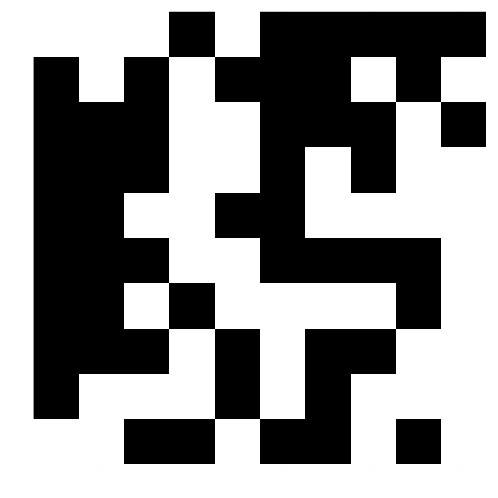

File 10by10_1_len3_weight_1x_divide_fixed.dat is generated


In [9]:
#should be moving v slow since this is divide, x dot is very large
# tested when graph generator used divide
s = 1
k = lambda_gen(parameters["images"],s)
print(k)
parameters["scaling"] = 1 ./ k 
res = HN_Solver_Traj(parameters);
sol_finder(res[1], parameters)
binary_image_visualizer(reshape(res[1][1], 10,10), 500, "mew", d = true)
save_trajectories(res[2], "10by10","len3_weight_$(s)x_divide_fixed")

[6.557754256787851e-5, 7.190520018407732e-5, 5.694891854578921e-5]

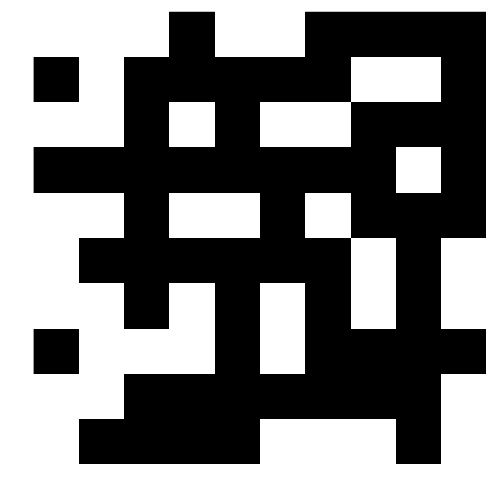

File 10by10_1_len3_weight_1x_multiply_correct.dat is generated


In [4]:
#to scale, simply make parameters["scaling"] = lambda_gen(parameters["images"],coeff)
# note, since scale is done by dividing, it is necessary to set scale to 1/lambda to make it multiple rather than divide with
# weights

#should be moving v slow since this is multiply, x dot is very small
# tested when graph generator used multiple
s = 1
k = lambda_gen(parameters["images"],s)
print(k)
parameters["scaling"] = k
res = HN_Solver_Traj(parameters);
sol_finder(res[1], parameters)
binary_image_visualizer(reshape(res[1][1], 10,10), 500, "mew", d = true)
save_trajectories(res[2], "10by10","len3_weight_$(s)x_multiply_correct")

[6.557754256787851e-5, 7.190520018407732e-5, 5.694891854578921e-5]

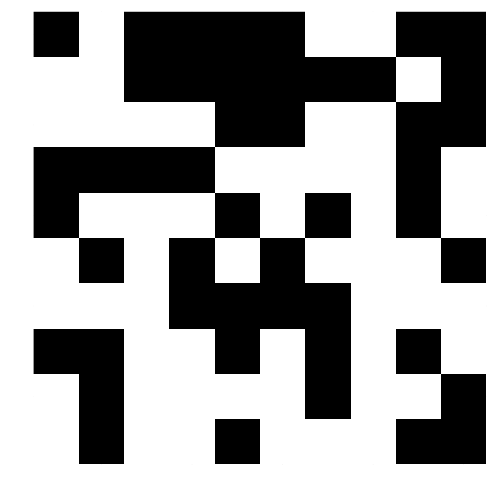

File 10by10_1_len3_weight_1x_multiply_wrong.dat is generated


In [5]:
#should be moving v large since this is multiply by 1/k, x dot is very large
# tested when graph generator used divide
s = 1
k = lambda_gen(parameters["images"],s)
print(k)
parameters["scaling"] = 1 ./ k 
res = HN_Solver_Traj(parameters);
sol_finder(res[1], parameters)
binary_image_visualizer(reshape(res[1][1], 10,10), 500, "mew", d = true)
save_trajectories(res[2], "10by10","len3_weight_$(s)x_multiply_wrong")